# 4. Funciones

Como en cualquier otro lenguaje, en Python también es posible definir funciones, es decir, secuencias de enunciados que reciben ciertos datos, ejecutan algunas operaciones sobre ellos y devuelven un resultado.

![Alt text](../images/function.png "Optional title")



Ya hemos usado anteriormente funciones como:

In [1]:
print(abs(-3))
print(round(6.25))

3
6


Pero como hacemos para definir nuestras propias funciones?

En Python, las funciones se definen mediante la instrucción **`def`** más un nombre de función, aplican las mismas reglas que para el nombre de las variables, seguido de paréntesis de apertura y cierre. Como toda estructura de control en Python, la definición de la función finaliza con dos puntos (:) y el algoritmo que la compone, irá identado con __4 espacios:__

In [2]:
def funcion_saludo(): 
    print("Hola")

Una función, no es ejecutada hasta tanto no sea invocada. Para invocar una función, simplemente se la llama por su nombre:

In [3]:
funcion_saludo()

Hola


También podemos pasarle argumentos de cualquier tipo:

In [4]:
def funcion_saludo2(name): #name viene a ser el parámetro de la función
    print("Hola " + name)
    
funcion_saludo2("Olenka")

Hola Olenka


Las funciones de vez en cuando suelen retornar algo:

In [5]:
def cuadrado(x):
    return x*x

cuadrado(7)

49

In [6]:
def funcion_suma(n):
    return n+10 #return hace que la función retorne algo en este caso un entero o flotante

k = funcion_suma(35)
print(k)
t = funcion_suma(3.5)
print(t)

45
13.5


En Python, también es posible llamar a una función, pasándole los argumentos esperados, como pares de claves=valor:

In [7]:
def saludar(nombre, mensaje='Hola'): 
    print(mensaje + nombre)
    
saludar("Maria")
saludar("Carla","Adios ")

HolaMaria
Adios Carla


### Algunos ejemplos de funciones

Ahora hallaremos la multiplicacion de los numeros de una lista:

In [8]:
def multipl(numbers):  
    total = 1
    for x in numbers:
        total *= x  
    return total  
print(multipl((3,8,2,1,-5)))

-240


Una función para imprimir una cadena al revés

In [9]:
def invertir_cadena(str1):
    rstr1 = ''
    index = len(str1)
    while index > 0:
        rstr1 += str1[ index - 1 ]
        index = index - 1
    return rstr1

print(invertir_cadena('54321abcd'))

dcba12345


Una funcion que dada una lista con numeros repetidos, esta función los elimine dando una funcion con numeros únicos:

In [10]:
def lista_unica(l):
    x = []
    for a in l:
        if a not in x:
            x.append(a)
    return x

print(lista_unica([1,1,2,2,2,3,3,3,3,5])) 

[1, 2, 3, 5]


Programa para saber si un numero es perfecto o no

In [11]:
def perfect_number(n):
    sum = 0
    for x in range(1, n):
        if n % x == 0:
            sum += x
    return sum == n
print(perfect_number(6)) 

True


Ahora una ultima funcion que verifica si una palabra es palíndrome (se lee igual de izquierda a derecha)

In [12]:
def isPalindrome(string):
    left_pos = 0
    right_pos = len(string) - 1
    
    while right_pos >= left_pos:
        if not string[left_pos] == string[right_pos]:
            return False
        left_pos += 1
        right_pos -= 1
    return True
print(isPalindrome('reconocer')) 

True


### Variables locales

Si no se han declarado como globales o no locales, las variables a las que se asigna valor en una función se consideran variables locales, es decir, sólo existen en la propia función, incluso cuando en el programa exista una variable con el mismo nombre, como muestra el siguiente ejemplo:

In [13]:
def imprime():
    x = 10
    print(x)

x = 16
imprime()
print(x)

10
16


Las variables locales sólo existen en la propia función y no son accesibles desde niveles superiores, como puede verse en el siguiente ejemplo:

In [14]:
def test():
    y = 6
    print(y)

test()
print(y)

6


NameError: name 'y' is not defined

Si en el interior de una función se asigna valor a una variable que no se ha declarado como global o no local, esa variable es local a todos los efectos. Por ello el siguiente programa da error:

In [15]:
def func_test():
    print(i)
    i = 8
    print(i)

i = 5
func_test()
print(i)

UnboundLocalError: local variable 'i' referenced before assignment

### Variables libres globales o no locales

Si a una variable no se le asigna valor en una función, Python la considera libre y busca su valor en los niveles superiores de esa función, empezando por el inmediatamente superior y continuando hasta el programa principal. Si a la variable se le asigna valor en algún nivel intermedio la variable se considera no local y si se le asigna en el programa principal la variable se considera global, como muestran los siguientes ejemplos:

In [16]:
# En el ejemplo siguiente, la variable libre "a" de la función subrutina() 
# se considera global porque obtiene su valor del programa principal:

def subrutina():
    print(a)

a = 5
subrutina()
print(a)

5
5


En el ejemplo siguiente, la variable libre "a" de la función sub_subrutina() se considera no local porque obtiene su valor de una función intermedia:

In [17]:
def subrutina():
    def sub_subrutina():
        print(a)

    a = 3
    sub_subrutina()
    print(a)

a = 4
subrutina()
print(a)

3
3
4


### Variables declaradas global o nonlocal

Si queremos asignar valor a una variable en una subrutina, pero no queremos que Python la considere local, debemos declararla en la función como global o nonlocal, como muestran los ejemplos siguientes:

En el ejemplo siguiente la variable se declara como global, para que su valor sea el del programa principal:

In [18]:
def subrutina():
    global a
    print(a)
    a = 1
    return

a = 5
subrutina()
print(a)

5
1


En el ejemplo siguiente la variable se declara como nonlocal, para que su valor sea el de la función intermedia:


In [19]:
def subrutina():
    def sub_subrutina():
        nonlocal a
        print(a)
        a = 1
        return

    a = 3
    sub_subrutina()
    print(a)
    return

a = 4
subrutina()
print(a)

3
1
4


### Argumentos y devolución de valores

Las funciones en Python admiten argumentos en su llamada y permiten devolver valores. Estas posiblidades permiten crear funciones más útiles y fácilmente reutilizables.
En este apartado se muestran estos conceptos mediante cuatro ejemplos. En ellos, no se pretende encontrar la mejor solución al problema planteado, sino simplemente introducir los conceptos de argumentos y devolución de valores.

Aunque las funciones en Python pueden acceder a cualquier variable del programa declarándolas como variables globales o no locales, se necesita saber el nombre de las variables, como muestra el ejemplo siguiente:


In [20]:
def escribe_media():
    media = (a + b) / 2
    print("La media de", a, "y", b, "es:", media)
    return 

a = 3
b = 5
escribe_media()
print("Programa terminado")

La media de 3 y 5 es: 4.0
Programa terminado


El problema de una función de este tipo es que es muy difícil de reutilizar en otros programas o incluso en el mismo programa, ya que sólo es capaz de hacer la media de las variables "a" y "b". Si en el programa no se utilizan esos nombres de variables, la función no funcionaría.
Para evitar ese problema, las funciones admiten argumentos, es decir, permiten que se les envíen valores con los que trabajar. De esa manera, las funciones se pueden reutilizar más fácilmente, como muestra el ejemplo siguiente:

In [21]:
def escribe_media(x, y):
    media = (x + y) / 2
    print("La media de", x, "y", y, "es:", media)
    return

a = 3
b = 5
escribe_media(a, b)
print("Programa terminado")

La media de 3 y 5 es: 4.0
Programa terminado


Esta función tiene todavía un inconveniente. Como las variables locales de una función son inaccesibles desde los niveles superiores, el programa principal no puede utilizar la variable "media" calculada por la función y tiene que ser la función la que escriba el valor. Pero eso complica la reutilización de la función, porque aunque es probable que en otro programa nos interese una función que calcule la media, es más difícil que nos interese que escriba el valor nada más calcularlo.
Para evitar ese problema, las funciones pueden devolver valores, es decir, pueden enviar valores al programa o función de nivel superior. De esa manera, las funciones se pueden reutilizar más fácilmente, como muestra el ejemplo siguiente:

In [22]:
def calcula_media(x, y):
    resultado = (x + y) / 2
    return resultado

a = 3
b = 5
media = calcula_media(a, b)
print("La media de", a, "y", b, "es:", media)
print("Programa terminado")

La media de 3 y 5 es: 4.0
Programa terminado


Pero esta función tiene todavía un inconveniente y es que sólo calcula la media de dos valores. Sería más interesante que la función calculara la media de cualquier cantidad de valores.
Para evitar ese problema, las funciones pueden admitir una cantidad indeterminada de valores, como muestra el ejemplo siguiente:


In [23]:
def calcula_media(*args):
    total = 0
    for i in args:
        total += i
    resultado = total / len(args)
    return resultado

a, b, c = 3, 5, 10
media = calcula_media(a, b, c)
print("La media de", str(a)+",", b, "y", c, "es:", media)
print("Programa terminado")

La media de 3, 5 y 10 es: 6.0
Programa terminado


Esta última función puede ser utilizada con más flexibilidad que las anteriores, puesto que el programador puede elegir de cuántos valores hacer la media y qué hacer con el valor calculado por la función.
Las funciones pueden devolver varios valores simultáneamente, como muestra el siguiente ejemplo:

In [24]:
def calcula_media_desviacion(*args): # con el simbolo * le digo a la funcion que la lista mutable
    total = 0
    for i in args:
        total += i
    media = total / len(args)
    total = 0
    for i in args:
        total += (i - media) ** 2
    desviacion = (total / len(args)) ** 0.5
    return media, desviacion

a, b, c, d = 3, 5, 10, 12
media, desviacion_std = calcula_media_desviacion(a, b, c, d)
print("Datos:", a, b, c, d)
print("Media:", media)
print("Desviación estándar:", desviacion_std)

Datos: 3 5 10 12
Media: 7.5
Desviación estándar: 3.640054944640259


Ahora vamos a ver el calculo de una integral:
funcion = x^2

$$\int{x^2 dx}$$

es equivalente a:

$$\sum_{i=0}^{n-1} \Delta x. (a + i \Delta x)^2$$

In [26]:
def integralX2(a,b,n):
    if n==0:
        sumatoria = 0.0
    else: 
        delta = (b-a)/n
        sumatoria = 0.0
        for i in range(n):
            sumatoria += delta * ( a + i*delta )**2
    
    return sumatoria

start = float(input("ingrese el limite inferior: "))
end = float(input("ingrese el limite superior: "))
n_particiones = int(input("Ingrese el numero de particiones: "))
res = 0.0

if end < start:
    print("El primer numero debe ser menor que el segundo >:v")
else:
    res = integralX2(start,end,n_particiones)
    print("El resultado de la integral es {}".format(res))

ingrese el limite inferior: 1
ingrese el limite superior: 5
Ingrese el numero de particiones: 100000
El resultado de la integral es 41.33285333440035


Para cualquier funcion:

In [27]:
def fcuadrado(x):
    return x*x

def fcubica(x):
    return x*x*x

def integral(f,a,b,n):
    if n==0:
        sumatoria = 0.0
    else: 
        delta = (b-a)/n
        sumatoria = 0.0
        for i in range(n):
            sumatoria += delta * f( a + i*delta )
    
    return sumatoria

start = float(input("ingrese el limite inferior: "))
end = float(input("ingrese el limite superior: "))
n_particiones = int(input("Ingrese el numero de particiones: "))
res = 0.0

if end < start:
    print("El primer numero debe ser menor que el segundo >:v")
else:
    res = integral(fcuadrado,start,end,n_particiones)
    print("El resultado de la integral de la funcion cuadrada es {}".format(res))
    res = integral(fcubica,start,end,n_particiones)
    print("El resultado de la integral de la funcion cubica es {}".format(res))

ingrese el limite inferior: 1
ingrese el limite superior: 5
Ingrese el numero de particiones: 10000
El resultado de la integral de la funcion cuadrada es 41.328533440000044
El resultado de la integral de la funcion cubica es 155.97520095999982


### Paso por valor o paso por referencia

En los lenguajes en los que las variables son "cajas" en las que se guardan valores, cuando se envía una variable como argumento en una llamada a una función suelen existir dos posiblidades:
- paso por valor: se envía simplemente el valor de la variable, en cuyo caso la función no puede modificar la variable, pues la función sólo conoce su valor, pero no la variable que lo almacenaba.
- paso por referencia: se envía la dirección de memoria de la variable, en cuyo caso la función sí que puede modificar la variable.

En Python no se hace ni una cosa ni otra. En Python cuando se envía una variable como argumento en una llamada a una función lo que se envía es la referencia al objeto al que hace referencia la variable. Dependiendo de si el objeto es mutable o inmutable, la función podrá modificar o no el objeto.
- En el ejemplo siguiente, la variable enviada a la función es una variable que hace referencia a un objeto inmutable.

<img src="https://blog.penjee.com/wp-content/uploads/2015/02/pass-by-reference-vs-pass-by-value-animation.gif">

In [28]:
# Ejemplo de paso de variable (objeto inmutable)

def aumenta(x):
    print(id(x))
    x += 1
    print(id(x))
    return x

a = 3
print(id(3), id(4))
print(id(a))
print(aumenta(a))
print(a)
print(id(a))

94436591434336 94436591434368
94436591434336
94436591434336
94436591434368
4
3
94436591434336


En el ejemplo siguiente, la variable enviada a la función es una variable que hace referencia a un objeto mutable.

In [29]:
# Ejemplo de paso de variable (objeto mutable)

def aumenta(x):
    print(id(x))
    x += [1]
    print(id(x))
    return x

a = [3]
print(id(a))
print(aumenta(a))
print(a)
print(id(a))

140345991904776
140345991904776
140345991904776
[3, 1]
[3, 1]
140345991904776


## Funciones recursivas

Se trata de funciones que se llaman a sí mismas durante su propia ejecución. Funcionan de forma similar a las iteraciones, y debemos encargarnos de planificar el momento en que una función recursiva deja de llamarse o tendremos una función rescursiva infinita.

Suele utilizarse para dividir una tarea en subtareas más simples de forma que sea más fácil abordar el problema y solucionarlo.

<img src="https://blog.penjee.com/wp-content/uploads/2015/04/top-5-programming-animated-gifs_recursion-animted-gif.gif">

In [30]:
def factorial(numero):
    if(numero == 0 or numero == 1):
        return 1
    else:
        return numero * factorial(numero-1)

In [31]:
factorial(5)

120

Otro ejemplo, Para calcular el producto de 2 numeros de manera recursiva

In [32]:
def Producto (m,n):
    if m==1:
        return n
    else:
        return n + Producto(m-1,n)

In [33]:
k = Producto(5,8)
print(k)

40


## Funciones Lambda

Python admite la creación de __funciones anónimas__ (es decir, funciones que no están enlazadas a un nombre) en tiempo de ejecución, usando una construcción llamada __"lambda"__. Esto no es exactamente lo mismo que lambda en los lenguajes de programación funcional, pero es un concepto muy poderoso que está bien integrado en Python y que a menudo se utiliza junto con conceptos funcionales típicos como __`filter()`, `map()` y `reduce()`__.

Este fragmento de código muestra la diferencia entre una definición normal de la función ( "f") y una función lambda ( "g"):

In [34]:
def f (x): 
    return x**2

f(8)

64

In [35]:
g = lambda x: x**2

g(8)

64

Tenga en cuenta que la definición lambda no incluye una declaración de "retorno" - que siempre contiene una expresión que se devuelve. 

In [36]:
def make_incrementor (n): 
    return lambda x: x + n

f = make_incrementor(2)
g = make_incrementor(6)

print (f(42), g(42))

44 48


### Método `map()`

La función __map( f(x) , list or sequence )__ aplica una función pasada a cada elemento en un objeto iterable y devuelve una lista que contiene todos los resultados de la llamada de función

In [37]:
# Definamos una función:

def sqr(x): 
    return x ** 2

In [38]:
a = [2,3,4]
print(list(map(sqr, a)))

[4, 9, 16]


In [39]:
# Creamos una lista:
foo = [2, 18, 9, 22, 17, 24, 8, 12, 27]

In [40]:
print (list(map(lambda x: x * 2 + 10, foo)))

[14, 46, 28, 54, 44, 58, 26, 34, 64]


### Método `filter()`

La función __filter( f(x) , list or sequence )__ como su nombre lo dice es como un filtro que llama la función para cada elemento de la secuencia, y devuelve una nueva lista que contiene solamente aquellos elementos para los que la función ha devuelto __"True"__. 

In [41]:
# Creamos una lista:
foo = [2, 18, 9, 22, 17, 24, 8, 12, 27]

print (list(filter(lambda x: x % 3 == 0, foo)))

[18, 9, 24, 12, 27]


In [42]:
list(range(-5,5))

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]

In [43]:
list( filter((lambda x: x < 0), range(-5,5)))

[-5, -4, -3, -2, -1]

### Método `reduce()`

Esta función reduce una lista a un solo valor combinando elementos a través de una función suministrada. 

Si seq = [s1, s2, s3, ..., sn], la llamada reduce (func, seq) funciona de la siguiente manera:
- En primer lugar, se aplicarán los primeros dos elementos de seq a func, es decir, func (s1, s2) La lista en la que reduce () funciona ahora se ve así: [func (s1, s2), s3, ..., sn]
- En el siguiente paso se aplicará func al resultado anterior y al tercer elemento de la lista, es decir func (func (s1, s2), s3) La lista se ve así ahora: [func (func (s1, s2), s3), ..., sn]
- Continúe así hasta que solo quede un elemento y devuelva este elemento como resultado de reduce ()

![Alt text](../images/reduce.png "Optional title")

In [44]:
from functools import reduce

reduce(lambda x,y: x+y, [47,11,42,13])

113

![Alt text](../images/reduce_diagram.png "Optional title")

In [45]:
foo = [2, 18, 9, 22, 17, 24, 8, 12, 27]

print (reduce(lambda x, y: x + y, foo))

139


In [46]:
reduce( (lambda x, y: x * y), [1, 2, 3, 4] )

24

## Iteradores

Un iterador es un objeto que representa una corriente de datos; Este objeto devuelve los datos un elemento a la vez. Un iterador de Python debe soportar un método llamado **__`next()`__** que no toma argumentos y siempre devuelve el siguiente elemento de la secuencia. Si no hay más elementos en el flujo,** __`next()`__ ()** debe aumentar la excepción **`StopIteration`**. Sin embargo, los iteradores no tienen que ser finitos; Es perfectamente razonable escribir un iterador que produce un flujo infinito de datos.

La función **`iter()`** incorporada toma un objeto arbitrario e intenta devolver un iterador que devolverá el contenido o los elementos del objeto, generando **`TypeError`** si el objeto no admite la iteración. Varios de los tipos de datos integrados de Python admiten iteración, siendo las más comunes las listas y los diccionarios. Un objeto se llama iterable si se puede obtener un iterador para ello.

Puede experimentar con la interfaz de iteración manualmente:

In [47]:
test = [6,3,7,2]
it = iter(test)
it

In [48]:
it.__next__()

6

In [49]:
next(it)

3

In [50]:
next(it)

7

In [51]:
next(it)

2

In [52]:
next(it)

StopIteration: 

In [53]:
for i in iter(test):
    print(i)

6
3
7
2


Los diccionarios soportan los iteradores:

In [54]:
m = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

for key in m:
    print(key, m[key])

Jan 1
Feb 2
Mar 3
Apr 4
May 5
Jun 6
Jul 7
Aug 8
Sep 9
Oct 10
Nov 11
Dec 12


## Veamos un fractal 

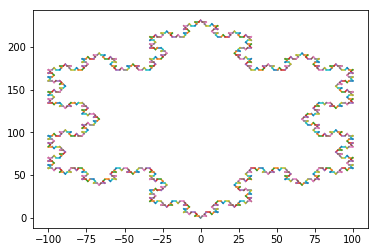

In [55]:
from math import sin, cos, pi
import matplotlib.pyplot as plt
%matplotlib inline

 
def kochSnowFlake(l, n):
    x_vertex1 = 0
    y_vertex1 = 0
     
    x_vertex2 = l * cos ( 2 * pi/3)
    y_vertex2 = l * sin(2 * pi/3)
     
    x_vertex3 = l * cos (pi/3)
    y_vertex3 = l * sin(pi/3)
     
    kochCurve(x_vertex1, y_vertex1, x_vertex2, y_vertex2, n)
    kochCurve(x_vertex2, y_vertex2, x_vertex3, y_vertex3, n)
    kochCurve(x_vertex3, y_vertex3, x_vertex1, y_vertex1, n)
     
    return
         
def kochCurve(xi, yi, xf, yf, n):
    if n==0:
       plt.plot([xi,xf],[yi,yf])
             
    elif n>0:
        x1 = xi + (xf - xi) / 3.0
        y1 = yi + (yf - yi) / 3.0
 
        x3 = xf - (xf - xi) / 3.0
        y3 = yf - (yf - yi) / 3.0
         
        x2 = (x1 + x3) * cos (pi/3) - ( y3 - y1) * sin (pi/3)
        y2 = (y1 + y3) * cos (pi/3) + ( x3 - x1) * sin (pi/3) 
 
        kochCurve(xi,yi,x1,y1,n-1)
        kochCurve(x1,y1,x2,y2,n-1)
        kochCurve(x2,y2,x3,y3,n-1)
        kochCurve(x3,y3,xf,yf,n-1)
         
    return
   
plt.figure("Koch snowflack")
kochSnowFlake(200,4) # range 1 -6
plt.show()

In [56]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/StyleCursoPython.css'
HTML(open(css_file, "r").read())